In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import ndimage
import tensorflow as tf

In [76]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

if x_train.any():
  print('Download Complete.')

Download Complete.


In [12]:
print
(
    f'trainset x shape: {x_train.shape}',
    f'trainset y shape: {y_train.shape}',
    f'test set x shape: {x_test.shape}',
    f'test set y shape: {y_test.shape}'
)  

('trainset x shape: (60000, 28, 28)',
 'trainset y shape: (60000,)',
 'test set x shape: (10000, 28, 28)',
 'test set y shape: (10000,)')

MNIST dataset have 60,000 pictures in train set, with 28 x 28 pixel values in each picture.
It has 10,000 pictures in test set, with 28 x 28 pixel values in each picture.

In [77]:
train_y_val, train_y_count = np.unique(y_train, return_counts=1)
train_y_freq = pd.DataFrame({'labels': train_y_val,'Counts':train_y_count})
print('Training Set Label Frequency: ')
print(train_y_freq)

test_y_val, test_y_count = np.unique(y_test, return_counts=1)
test_y_freq = pd.DataFrame({'labels': test_y_val,'Counts':test_y_count})
print('\n Test Set Label Frequency: ')
print(test_y_freq)


Training Set Label Frequency: 
   labels  Counts
0       0    5923
1       1    6742
2       2    5958
3       3    6131
4       4    5842
5       5    5421
6       6    5918
7       7    6265
8       8    5851
9       9    5949

 Test Set Label Frequency: 
   labels  Counts
0       0     980
1       1    1135
2       2    1032
3       3    1010
4       4     982
5       5     892
6       6     958
7       7    1028
8       8     974
9       9    1009


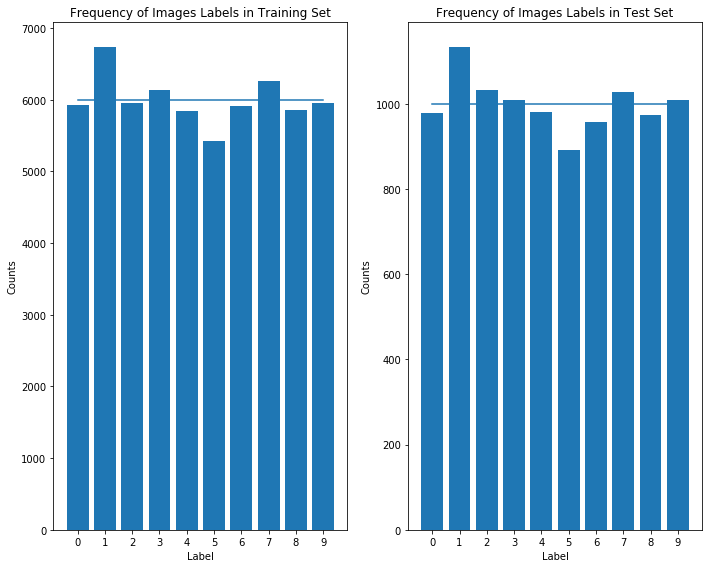

In [78]:
# plot the image label counts for two datasets
label_size=train_y_freq.shape[0]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
#axes[0].plot(x1, y1)
#axes[1].plot(x2, y2)

# train set
#plt.figure(figsize=(10, 8))
axes[0].bar(train_y_freq.labels, train_y_freq.Counts);
axes[0].plot(train_y_freq.labels, np.ones(label_size)*train_y_freq.Counts.mean());
plt.sca(axes[0])
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Frequency of Images Labels in Training Set')
plt.xticks(np.arange(10));

# test set
#plt.figure(figsize=(6, 4))
axes[1].bar(test_y_freq.labels, test_y_freq.Counts);
axes[1].plot(test_y_freq.labels, np.ones(label_size)*test_y_freq.Counts.mean());
plt.sca(axes[1])
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Frequency of Images Labels in Test Set')
plt.xticks(np.arange(10));

fig.tight_layout()

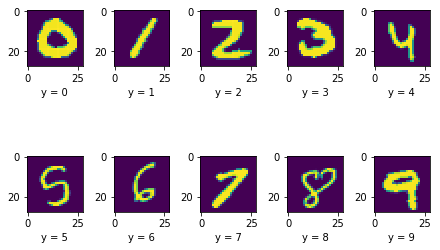

In [91]:
# display all digits randomly by each run.


def generate_digit_index(y):
  digit_index = {}
  classes, min_freq = np.unique(y, return_counts=True)
  random_ = np.random.randint(min_freq.min())
  
  for digit in range(len(classes)):
    if digit in digit_index:
      pass
    else:
      digit_index[digit] = np.where(y_train==digit)[0][random_]
  return digit_index    
    
digit_index = generate_digit_index(y_train)

fig, axes = plt.subplots(nrows=2, ncols=5, constrained_layout=True)

for digit in digit_index:
  
  pos = digit_index[digit]
  
  if digit < 5:
    axes[0, digit].imshow(x_train[pos])
    plt.sca(axes[0, digit])
    plt.xlabel(f'y = {y_train[pos]}')
  else:
    axes[1, digit-5].imshow(x_train[pos])
    plt.sca(axes[1, digit-5])
    plt.xlabel(f'y = {y_train[pos]}')
    

In [98]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [101]:
# Reshape the features

m_train = x_train.shape[0]
m_test = x_test.shape[0]
num_px = x_train.shape[1]

train_x_flatten = x_train.reshape(m_train, -1).T
test_x_flatten = x_test.reshape(m_test, -1,).T

print
(
f'train set flatten shape: {train_x_flatten.shape}\n',
f'test set flatten shape: {test_x_flatten.shape}\n',
f'height/width in each picture: {num_px}'
)

print('sanity check: {}'.format(train_x_flatten[152:159, 0])) # expected: array([  3,  18,  18,  18, 126, 136, 175], dtype=uint8)

sanity check: [  3  18  18  18 126 136 175]


In [0]:
# standardize dataset
train_set_x = train_x_flatten/255.
test_set_x = test_x_flatten/255.

In [0]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [104]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [0]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [106]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [0]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T,X)+b)                                    # compute activation
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))                                 # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1/m)*np.dot(X, (A-Y).T)
    db = (1/m)*np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost